In [46]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("HR Employee Attrition.csv", na_values='?')

In [26]:
df.shape

(1470, 35)

In [27]:
df = df.dropna()

In [28]:
df.shape

(1470, 35)

In [33]:
lb = LabelEncoder()
df['EducationField'] = lb.fit_transform(df['EducationField'])
df['BusinessTravel'] = lb.fit_transform(df['BusinessTravel'])
df['Attrition'] = lb.fit_transform(df['Attrition'])
df['Department'] = lb.fit_transform(df['Department'])
df['Gender'] = lb.fit_transform(df['Gender'])
df['JobRole'] = lb.fit_transform(df['JobRole'])
df['MaritalStatus'] = lb.fit_transform(df['MaritalStatus'])
df['OverTime'] = lb.fit_transform(df['OverTime'])
df['Over18'] = lb.fit_transform(df['Over18'])



In [37]:
d = df.drop(['Attrition'], axis=1)

In [39]:
d.shape

(1470, 34)

In [40]:
Y = df['Attrition']
X = d

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=43)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1029, 34) (441, 34) (1029,) (441,)


In [49]:
scaler_features = StandardScaler()
scaler_target = StandardScaler()

In [50]:
X_train = scaler_features.fit_transform(X_train.values)
y_train = scaler_target.fit_transform(y_train.values[:,None])

In [52]:
pca = PCA(n_components=2,random_state=43)
data_pca = pca.fit_transform(X_train)

Text(0, 0.5, 'Second PCA Component')

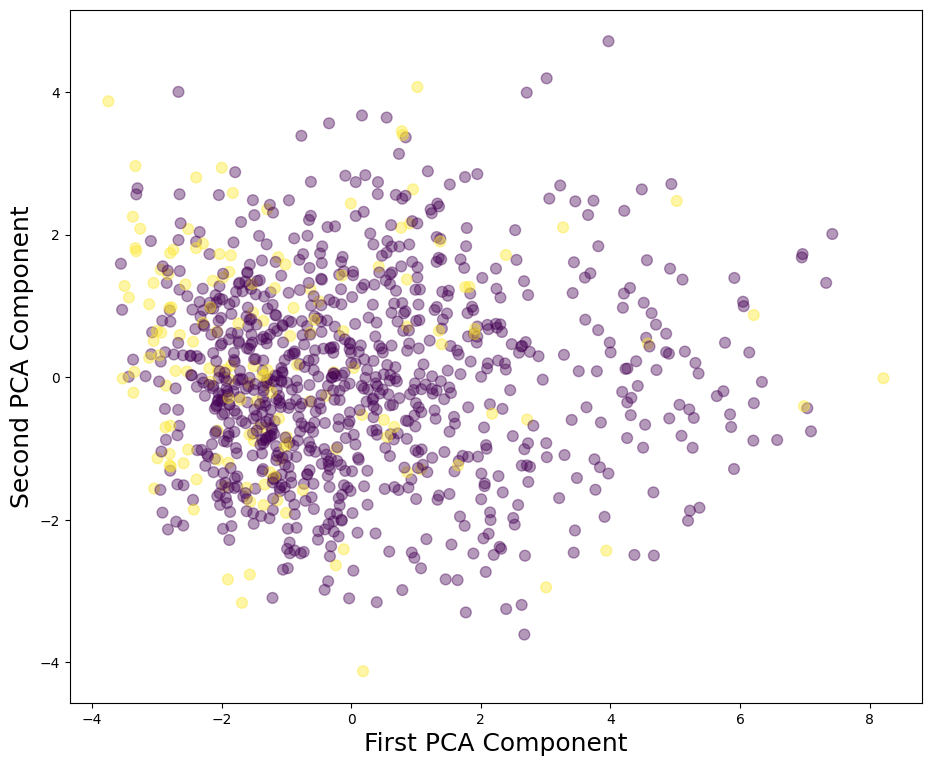

In [53]:
fig, axs = plt.subplots(1,1,figsize=(11,9))
axs.scatter(data_pca[:,0],data_pca[:,1],c=y_train,alpha=0.4,s=60)
axs.set_xlabel("First PCA Component",fontsize=18)
axs.set_ylabel("Second PCA Component",fontsize=18)

In [54]:
evr = pca.explained_variance_ratio_
total_evr = evr.sum() * 100
print("Explained variation per principal component: {}".format(evr))
print("Total percentage of variance captured by the first 2 components of PCA: {}".format(total_evr))
print("Strength of each PCA components: ",pca.singular_values_)

Explained variation per principal component: [0.15280603 0.06109037]
Total percentage of variance captured by the first 2 components of PCA: 21.389640004096343
Strength of each PCA components:  [69.81661278 44.14432971]
